In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("output/vipersRndAdvanced/regres/eval_nFile0/ANNZ_randomReg_0000.csv")

In [6]:
data

,D:z,F:MAG_G,F:MAGERR_I,F:ANNZ_0,F:ANNZ_0_wgt,F:ANNZ_0_err,F:ANNZ_1,F:ANNZ_1_wgt,F:ANNZ_1_err,F:ANNZ_2,...,F:ANNZ_PDF_0_190,F:ANNZ_PDF_0_191,F:ANNZ_PDF_0_192,F:ANNZ_PDF_0_193,F:ANNZ_PDF_0_194,F:ANNZ_PDF_0_195,F:ANNZ_PDF_0_196,F:ANNZ_PDF_0_197,F:ANNZ_PDF_0_198,F:ANNZ_PDF_0_199
0,0.9220,23.455591,0.050792,0.687640,0.391293,0.048796,0.753208,0.391293,0.078127,0.742084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0.5642,23.465914,0.096646,0.626523,0.475092,0.046906,0.610927,0.475092,0.119653,0.641383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0.8254,23.971067,0.156225,0.902746,0.904320,0.038352,0.901605,0.904320,0.159450,0.942018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0.6210,22.719189,0.031047,0.586237,0.494141,0.022854,0.552808,0.494141,0.055969,0.572250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0.6225,23.944067,0.050919,0.660743,0.186740,0.042962,0.611522,0.186740,0.055971,0.576343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,0.9505,23.818045,0.093013,0.708988,0.548481,0.069052,0.700787,0.548481,0.102936,0.698973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14292,0.4956,23.633961,0.112517,0.571874,0.506043,0.042789,0.614091,0.506043,0.071512,0.550920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14293,0.4978,24.000299,0.196612,0.613673,0.695297,0.070340,0.534206,0.695297,0.093166,0.556011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14294,0.4979,22.414507,0.044636,0.500275,0.665806,0.021799,0.456509,0.665806,0.052387,0.476921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [7]:
import metrics
result = metrics.compute_metrics(data["D:z"].values,data["F:ANNZ_best"].values,"ANNz")

In [9]:
result.to_frame()

,ANNz
RMSE_znorm,0.084427
bias_znorm,0.005551
std_znorm,0.084244
RMSE,0.130057
|znorm| > 0.15 (%),4.001119
|znorm| > 3std (%),1.489927
scatter,0.084427
bias,0.047504
fr015,95.998881
sigma68,0.081138


In [10]:
pdf = np.empty((len(data),200))
pdf.shape

(14296, 200)

In [11]:
for i in range(200):
    teste = data["F:ANNZ_PDF_0_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf[:,i] = teste[:,0]

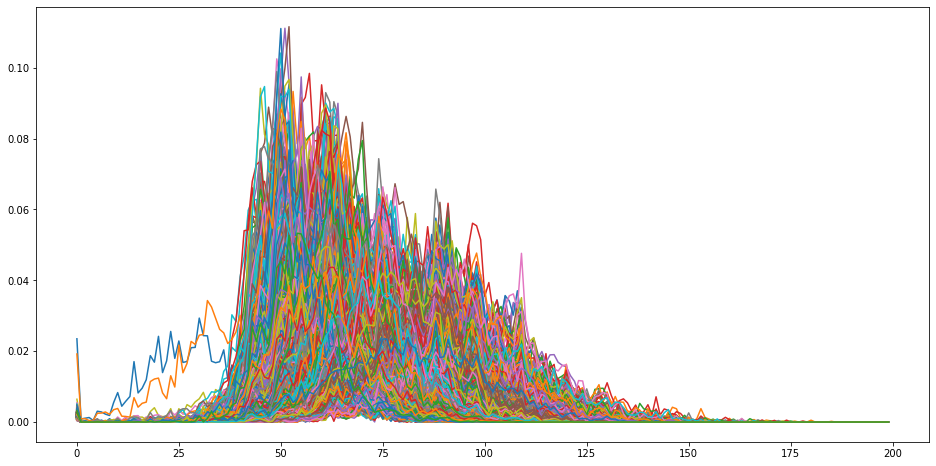

In [15]:
plt.figure(figsize=(16,8))
for i in range(len(pdf)//15):
    plt.plot(pdf[i,:])